# ***CODE DEVELOPMENT AND TESTING NOTEBOOK***
Logan Kelsch created on 1/30/2026

#### Testing initial structure of each transformation function

In [4]:
%pip install numba
%pip install pandas
%pip install matplotlib
%pip install bottleneck

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/logankelsch/SR/Structural_Regression/.venv/lib/python3.12/site-packages/pip/__main__.py", line 24, in <module>
    sys.exit(_main())
             ^^^^^^^
  File "/home/logankelsch/SR/Structural_Regression/.venv/lib/python3.12/site-packages/pip/_internal/cli/main.py", line 47, in main
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/logankelsch/SR/Structural_Regression/.venv/lib/python3.12/site-packages/pip/_internal/cli/autocompletion.py", line 12, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/logankelsch/SR/Structural_Regression/.venv/lib/python3.12/site-packages/pip/_

In [ ]:
import numpy as np
data = np.random.random((20,2))*2-1
'''
data = np.zeros((20,2))
data2 = np.zeros((20,2))
for i in range(data.shape[0]):
    data[i,0]=(i-10)/2
for i in range(data.shape[0]):
    data[i,1]=(i-5)/5
'''

'\ndata = np.zeros((20,2))\ndata2 = np.zeros((20,2))\nfor i in range(data.shape[0]):\n    data[i,0]=(i-10)/2\nfor i in range(data.shape[0]):\n    data[i,1]=(i-5)/5\n'

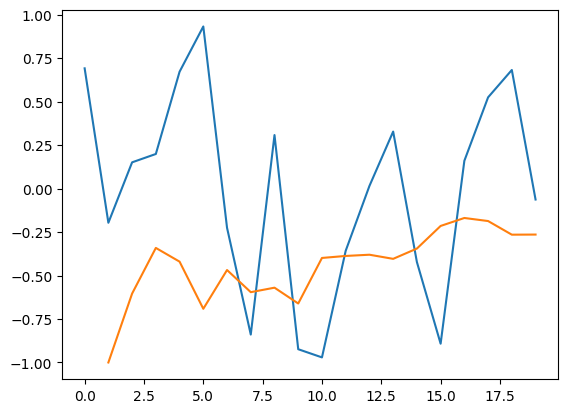

In [ ]:
import transform as _T

x = np.zeros(data.shape, dtype=np.float32)
_T.t_COR(data[:,[0]], data[:,[1]], 20, out=x)

#print(x)``
import matplotlib.pyplot as plt

plt.plot(data[:,0])
plt.plot(x[:,0])
plt.show()

#### Constructing Data Structure for holding data points (MEP-ish structure)

In [ ]:
#import population as _P

#gene = _P.gene()
#gene.exp = 'F1fdsaklfd'

#print(gene.exp)

In [55]:
import pandas as pd
import numpy as np

import transform as _T
import initialization as _I
import visualization as _V
from importlib import reload

reload(_I)

x_raw = pd.read_csv('../data/spy5m.csv')

#creating initial population
X = _I.Population(
    X_inst=x_raw.values, 
    terminal_idx=[1,2,3,4],
    excluded_idx=[0],
    max_size=1005
)

grammar = _I.Grammar('None', max_delta_lookback=240)

#print(f'initial L and G size: {X._L_idx}, {X._G_idx}')

inst_inst = _I.generate_genes(X, grammar, 1000, 100)

900 Generations Remaining.
800 Generations Remaining.
700 Generations Remaining.
600 Generations Remaining.
500 Generations Remaining.
400 Generations Remaining.
300 Generations Remaining.
200 Generations Remaining.
100 Generations Remaining.


In [56]:
reload(_I)
ft = _I.family_tree_indices(X._instructions, [100, 200, 300, 400])
print(ft, 'length:', len(ft))
flush_mapping = _I.flush_population(X, ft)
print(X._instructions[:10])

[  1   4  35  41  48 100 171 200 300 400] length: 10
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  1.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  2.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  3.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  4.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.        ]
 [  5.           4.          32.           0.          32.
   -1.           0.           0.           0.           0.
    0.        ]
 [  6.           8.          32.           0.          32.
   -5.           0.           0.           0.           0.
    0.        ]
 [  7.   

In [ ]:
#this output is in number order showing that the instruction space is fully condensed
print(np.unique(flush_mapping))
print(flush_mapping[:10])

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4 -1 -1 -1 -1 -1]


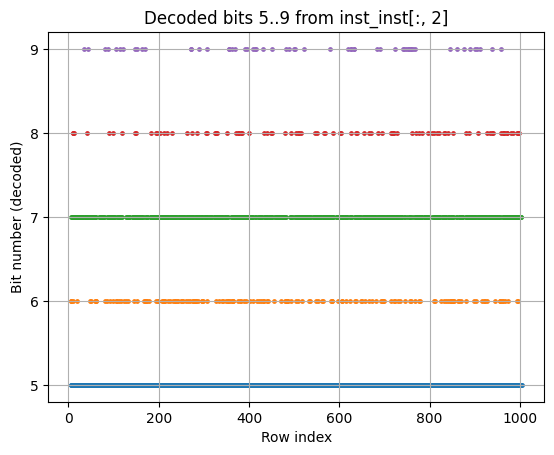

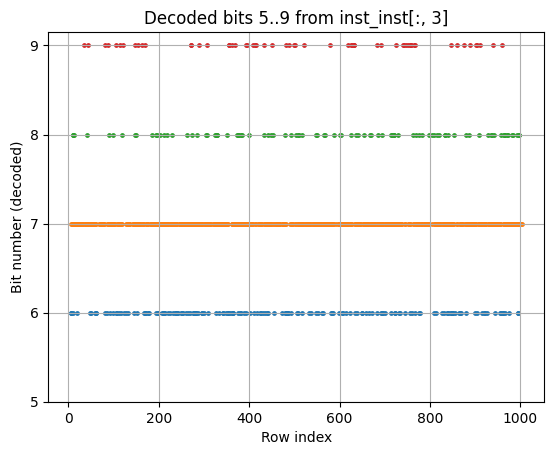

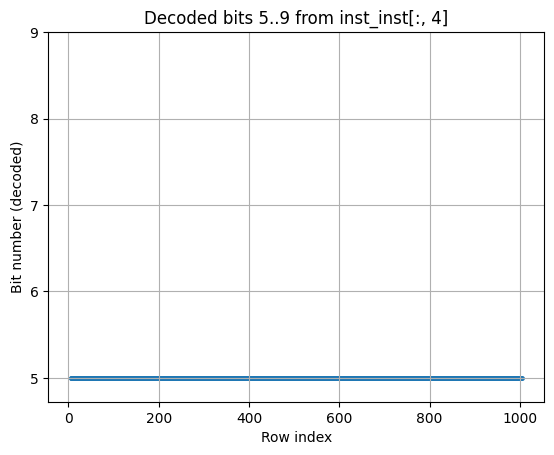

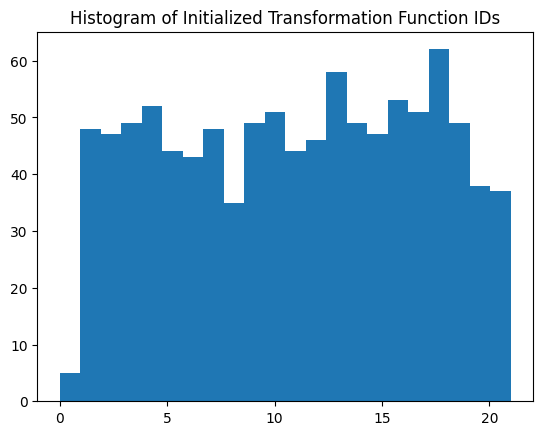

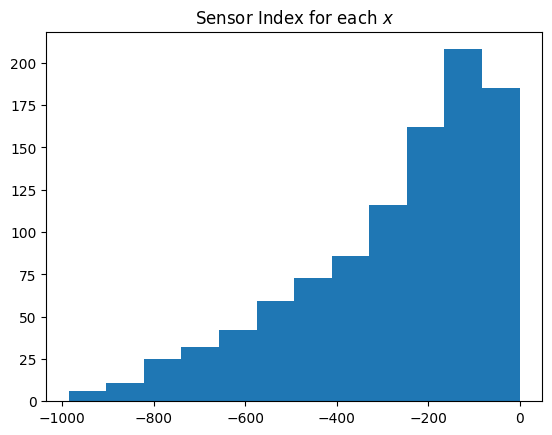

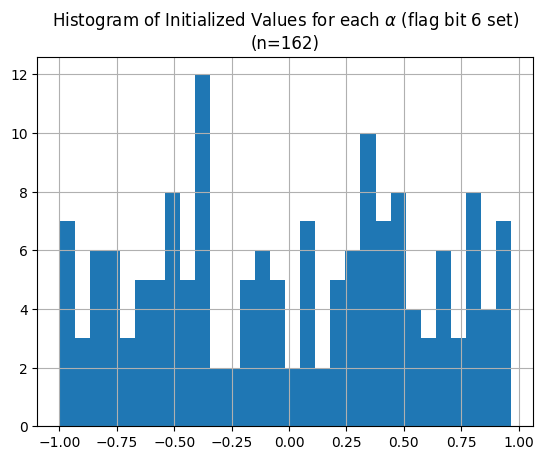

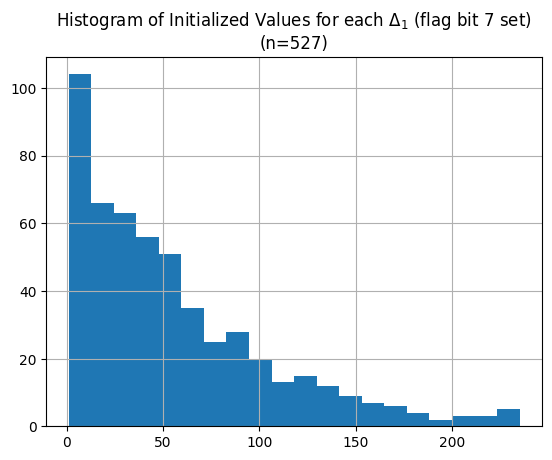

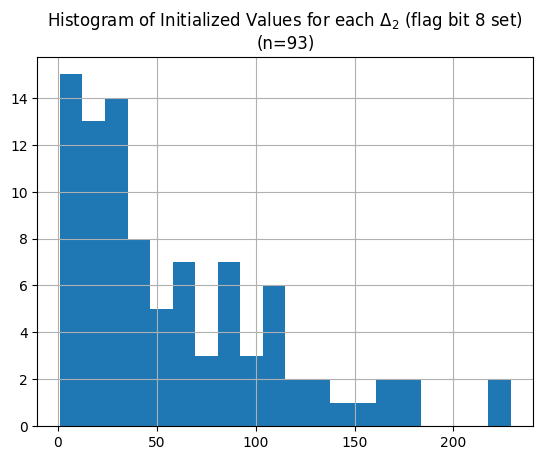

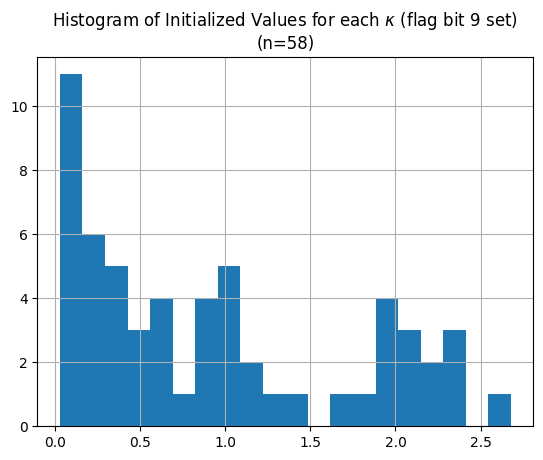

In [6]:
_V.plot_flags(X._instructions)
#format for instructions [pop_idx, func_id, USED_FLAGS, CONST_FLAGS, SENSOR_FLAGS, x, a, d, dd, k]

_V.plot_instruction_demo(X._instructions)